Synthetic data

1500 instances - 0 or 1 - binary problem

class 1 3 Gaussian distribution - [6,14], [10,6][14,14]

class 0 - Uniform distribution - 20


In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt


In [10]:
#matplotlib inline

In [11]:
from numpy.random import random

In [12]:
N=1500

In [13]:
mean1=[6,14]

In [14]:
mean2=[10,6]

In [15]:
mean3=[14,14]

In [16]:
cov=[[3.5, 0],[0,3.5]]

In [17]:
cov

[[3.5, 0], [0, 3.5]]

In [18]:
np.random.seed(50)

In [19]:
X=np.random.multivariate_normal(mean1,cov, int(N/6))

In [20]:
X.shape

(250, 2)

In [21]:
X[0]

array([ 3.0808485 , 13.94204621])

In [22]:
X[:,1].sum()

3447.8139448036873

In [23]:
3447.8139448036873/250

13.79125577921475

In [24]:
X= np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))

In [25]:
X.shape

(500, 2)

In [26]:
X= np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))

In [27]:
X.shape

(750, 2)

In [28]:
X=np.concatenate((X, 20*np.random.rand(int(N/2), 2)))

In [29]:
X.shape

(1500, 2)

In [30]:
X

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       ...,
       [17.10881966,  8.27100981],
       [ 4.63522923,  4.47963684],
       [ 7.45080691,  0.31260003]])

In [31]:
y=np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))

In [32]:
y

array([1., 1., 1., ..., 0., 0., 0.])

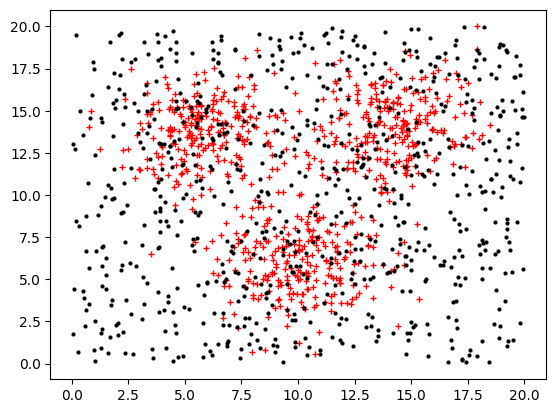

In [33]:
plt.plot(X[:int(N/2), 0], X[:int(N/2),1], 'r+', X[int(N/2):,0],X[int(N/2):,1],'k.', ms=4)

In [34]:
X

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       ...,
       [17.10881966,  8.27100981],
       [ 4.63522923,  4.47963684],
       [ 7.45080691,  0.31260003]])

In [35]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [36]:
#create DT using the data here!

In [37]:
from sklearn import tree

In [38]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [39]:
clf # initialized the DT

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [40]:
clf=clf.fit(X,y)

In [41]:
import pydotplus

In [42]:
from IPython.display import Image

In [43]:
from sklearn.tree import export_graphviz

In [44]:
print(type(X))

<class 'numpy.ndarray'>


In [45]:
print(type(y))

<class 'numpy.ndarray'>


In [48]:
import pandas as pd

In [49]:
# Convert the NumPy array to a Pandas DataFrame
X_df = pd.DataFrame(X)

# Extract the column names from the DataFrame
feature_names = X_df.columns

# Call the export_graphviz function with the correct arguments
dot_data = export_graphviz(clf, feature_names=feature_names,
                              class_names=['numpy.ndarray','numpy.ndarray'],
                              filled=True, out_file=None)

In [50]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="1 <= 3.217\\nentropy = 1.0\\nsamples = 1500\\nvalue = [750, 750]\\nclass = numpy.ndarray", fillcolor="#ffffff"] ;\n1 [label="0 <= 6.684\\nentropy = 0.455\\nsamples = 136\\nvalue = [123, 13]\\nclass = numpy.ndarray", fillcolor="#e88e4e"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="entropy = 0.0\\nsamples = 40\\nvalue = [40, 0]\\nclass = numpy.ndarray", fillcolor="#e58139"] ;\n1 -> 2 ;\n3 [label="0 <= 11.479\\nentropy = 0.572\\nsamples = 96\\nvalue = [83, 13]\\nclass = numpy.ndarray", fillcolor="#e99558"] ;\n1 -> 3 ;\n4 [label="entropy = 0.82\\nsamples = 47\\nvalue = [35, 12]\\nclass = numpy.ndarray", fillcolor="#eeac7d"] ;\n3 -> 4 ;\n5 [label="entropy = 0.144\\nsamples = 49\\nvalue = [48, 1]\\nclass = numpy.ndarray", fillcolor="#e6843d"] ;\n3 -> 5 ;\n6 [label="1 <= 17.465\\nentropy = 0.995\\nsamples = 1364\\nvalue = [627, 737]

In [51]:
graph=pydotplus.graph_from_dot_data(dot_data)

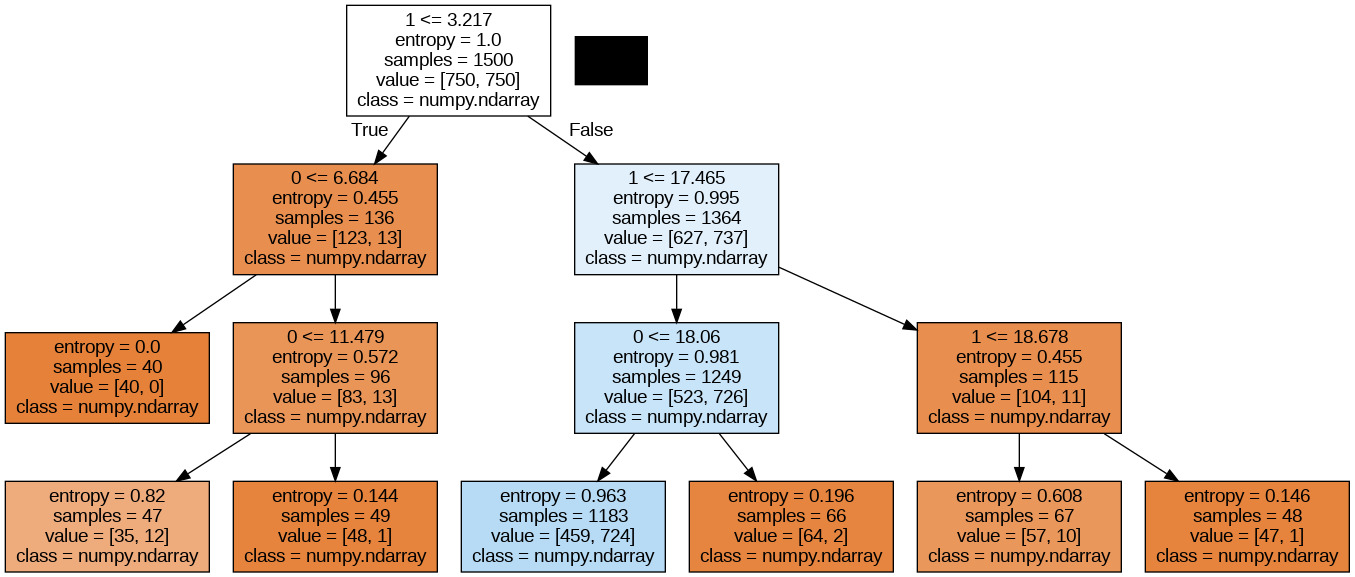

In [52]:
graph


Image(graph.create_png())

In [1]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [54]:
X_test.shape

(300, 2)

In [55]:
MaxDepth = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55]

In [56]:
trainAccuracy = np.zeros(len(MaxDepth))

In [57]:
trainAccuracy

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [58]:
testAccuracy = np.zeros(len(MaxDepth))

In [59]:
testAccuracy

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [60]:
index = 0

In [61]:
for depth in MaxDepth:
  clf = tree.DecisionTreeClassifier(max_depth = depth)
  clf = clf.fit(X_train,y_train)
  y_predictTrain = clf.predict(X_train)
  y_predictTest = clf.predict(X_test)
  trainAccuracy[index] = accuracy_score(y_train,y_predictTrain)
  testAccuracy[index] = accuracy_score(y_test,y_predictTest)
  index += 1

In [62]:
trainAccuracy

array([0.63416667, 0.6875    , 0.7225    , 0.7275    , 0.75833333,
       0.79416667, 0.8025    , 0.83      , 0.84583333, 0.94833333,
       0.98666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [63]:
testAccuracy

array([0.63333333, 0.68333333, 0.73      , 0.74333333, 0.71666667,
       0.71333333, 0.72333333, 0.71      , 0.7       , 0.67      ,
       0.64333333, 0.64333333, 0.64      , 0.65666667, 0.65333333,
       0.64666667, 0.64333333, 0.63666667])

Text(0, 0.5, 'Accuracy')

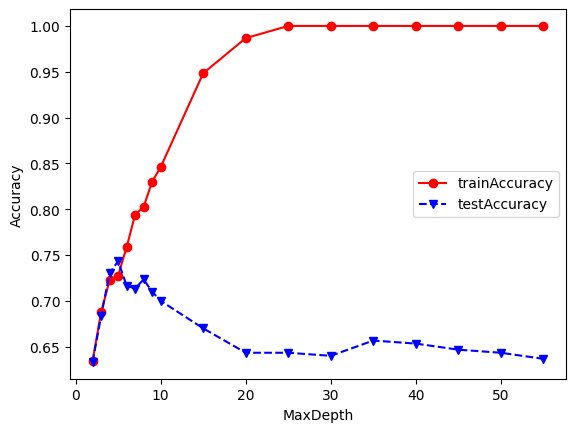

In [64]:
plt.plot(MaxDepth,trainAccuracy,'ro-',MaxDepth,testAccuracy,'bv--')
plt.legend(['trainAccuracy','testAccuracy'])
plt.xlabel('MaxDepth')
plt.ylabel('Accuracy')

In [65]:
import csv

In [66]:
csv_filename = "synthetic_data.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Feature 1', 'Feature 2', 'Class'])  # Write header
    writer.writerows(np.column_stack((X, y)))

print("CSV file saved successfully:", csv_filename)

CSV file saved successfully: synthetic_data.csv
